In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
df_train.shape

(1460, 81)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### first we remove missing values from training set

In [6]:
train_null_cols = df_train.columns[df_train.isnull().any()]
train_null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
test_null_cols = df_test.columns[df_test.isnull().any()]
test_null_cols

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [8]:
## 1. LotFrontage(3)

In [9]:
df_train['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [10]:
df_test['LotFrontage'].value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
149.0      1
117.0      1
121.0      1
101.0      1
22.0       1
Name: LotFrontage, Length: 115, dtype: int64

In [11]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(method = 'bfill')
df_train['LotFrontage'] = df_train['LotFrontage'].astype(int)

In [12]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(method = 'bfill')
df_test['LotFrontage'] = df_test['LotFrontage'].astype(int)

In [13]:
## 2. Alley(6)

In [14]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
df_test['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [16]:
# NA = No alley access
df_train['Alley'] = df_train['Alley'].fillna('NA')

In [17]:
df_test['Alley'] = df_test['Alley'].fillna('NA')

In [18]:
df_train['Alley'].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [19]:
df_test['Alley'].value_counts()

NA      1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [20]:
## 3. MasVnrType (25)

In [21]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
df_test['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [23]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [24]:
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

In [25]:
## 4. MasVnrArea (26)

In [26]:
df_train['MasVnrArea'].value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [27]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

In [28]:
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [29]:
# remove missing values from basement columns
#  5.  BsmtQual (30)      
#  6.  BsmtCond (31)      
#  7.  BsmtExposure (32)  
#  8.  BsmtFinType1 (33) 
#  9.  BsmtFinType2 (35)

In [30]:
Bsmt_nl_cols = [ 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
null_index = (df_train['BsmtCond'][df_train['BsmtCond'].isnull() == True]).index.tolist()

In [31]:
# fill missing value of basement columns
for i in Bsmt_nl_cols:
    for j in range(len(null_index)):
        df_train[i].iloc[null_index[j]] = 'No Basement'

In [32]:
df_train['BsmtCond'].isnull().sum()

0

In [33]:
df_train['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [34]:
print(df_test['BsmtCond'].isnull().sum())
df_test['BsmtCond'].value_counts()

45


TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [35]:
df_train['BsmtQual'].isnull().sum()

0

In [36]:
df_train['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [37]:
print(df_test['BsmtQual'].isnull().sum())
df_test['BsmtQual'].value_counts()

44


TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [38]:
df_train['BsmtExposure'].isnull().sum()

1

In [39]:
df_train['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     37
Name: BsmtExposure, dtype: int64

In [40]:
df_train['BsmtFinType1'].isnull().sum()

0

In [41]:
df_train['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [42]:
df_train['BsmtFinType2'].isnull().sum()

1

In [43]:
df_train['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [44]:
df_train['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     37
Name: BsmtExposure, dtype: int64

In [45]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [46]:
df_train['BsmtExposure'].isnull().sum()

0

In [47]:
df_train['BsmtExposure'].value_counts()

No             954
Av             221
Gd             134
Mn             114
No Basement     37
Name: BsmtExposure, dtype: int64

In [48]:
df_train['BsmtFinType2'].isnull().sum()

0

In [49]:
df_train['BsmtFinType2'].value_counts()

Unf            1257
Rec              54
LwQ              46
No Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [50]:
# test data 

In [51]:
## for test data
Bsmt_nl_test = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
test_nl_index = (df_test['BsmtFinType1'][df_test['BsmtFinType1'].isnull() == True]).index.tolist()

In [52]:
for i in Bsmt_nl_test:
    for j in range(len(test_nl_index)):
        df_test[i].iloc[test_nl_index[j]] = 'No Basement'

In [53]:
print(df_test['BsmtQual'].isnull().sum())
print(df_test['BsmtQual'].value_counts())
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0]) 

2
TA             634
Gd             591
Ex             137
Fa              53
No Basement     42
Name: BsmtQual, dtype: int64


In [54]:
print(df_test['BsmtCond'].isnull().sum())
print(df_test['BsmtCond'].value_counts())
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0]) 

3
TA             1295
Fa               59
Gd               57
No Basement      42
Po                3
Name: BsmtCond, dtype: int64


In [55]:
print(df_test['BsmtExposure'].isnull().sum())
print(df_test['BsmtExposure'].value_counts())
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0]) 

2
No             951
Av             197
Gd             142
Mn             125
No Basement     42
Name: BsmtExposure, dtype: int64


In [56]:
print(df_test['BsmtFinType1'].isnull().sum())

0


In [57]:
print(df_test['BsmtFinType2'].isnull().sum())

0


In [58]:
# 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath'

In [59]:
for i in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath']:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [60]:
## 10. Electrical (42)

In [61]:
df_train['Electrical'].isnull().sum()

1

In [62]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [63]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [64]:
## 11. FireplacceQu (57)

In [65]:
df_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [66]:
df_train['FireplaceQu'].isnull().sum()

690

In [67]:
df_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [68]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('No Fireplaces')

In [69]:
df_train['FireplaceQu'].value_counts()

No Fireplaces    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [70]:
# for test
df_test['Fireplaces'].value_counts()

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

In [71]:
df_test['FireplaceQu'].isnull().sum()

730

In [72]:
df_test['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [73]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('No Fireplaces')

In [74]:
## remove missing values from garage columns
# 12.  58  GarageType     
# 13.  59  GarageYrBlt    
# 14.  60  GarageFinish    
# 15.  63  GarageQual     
# 16.  64  GarageCond     

In [75]:
gr_nl_cols = ['GarageType','GarageYrBlt' ,'GarageFinish','GarageQual','GarageCond']
gr_nl_index = (df_train['GarageType'][df_train['GarageType'].isnull() == True]).index

In [76]:
for i in gr_nl_cols:
    for j in gr_nl_index:
        df_train[i].iloc[j] = 'No Garage'

In [77]:
df_train['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [78]:
df_train['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [79]:
df_train['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [80]:
df_train['GarageYrBlt'].isnull().sum()

0

In [81]:
df_train['GarageYrBlt'].value_counts()

No Garage    81
2005.0       65
2006.0       59
2004.0       53
2003.0       50
             ..
1908.0        1
1933.0        1
1927.0        1
1906.0        1
1900.0        1
Name: GarageYrBlt, Length: 98, dtype: int64

In [82]:
df_train['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [83]:
# for test data
#'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea','GarageQual', 'GarageCond'


In [84]:
gr_nl_test = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
test_gnl_index = (df_test['GarageType'][df_test['GarageType'].isnull() == True]).index
type(gr_nl_test)

list

In [85]:
for i in gr_nl_test:
    for j in range(len(test_gnl_index)):
        df_test[i].iloc[test_gnl_index[j]] = 'No Garage'

In [86]:
df_test['GarageType'].isnull().sum()

0

In [87]:
df_test['GarageType'].value_counts()

Attchd       853
Detchd       392
BuiltIn       98
No Garage     76
2Types        17
Basment       17
CarPort        6
Name: GarageType, dtype: int64

In [88]:
print(df_test['GarageYrBlt'].isnull().sum())
print(df_test['GarageYrBlt'].value_counts())
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0]) 

2
2005.0       77
No Garage    76
2007.0       66
2006.0       56
2004.0       46
             ..
1943.0        1
2207.0        1
1896.0        1
1932.0        1
1895.0        1
Name: GarageYrBlt, Length: 98, dtype: int64


In [89]:
print(df_test['GarageFinish'].isnull().sum())
print(df_test['GarageFinish'].value_counts())
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0]) 

2
Unf          625
RFn          389
Fin          367
No Garage     76
Name: GarageFinish, dtype: int64


In [90]:
print(df_test['GarageQual'].isnull().sum())
print(df_test['GarageQual'].value_counts())
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0]) 

2
TA           1293
Fa             76
No Garage      76
Gd             10
Po              2
Name: GarageQual, dtype: int64


In [91]:
print(df_test['GarageCond'].isnull().sum())
print(df_test['GarageCond'].value_counts())
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0]) 

2
TA           1328
No Garage      76
Fa             39
Po              7
Gd              6
Ex              1
Name: GarageCond, dtype: int64


In [92]:
 # 'GarageCars', 'GarageArea',

In [93]:
print(df_test['GarageCars'].isnull().sum())
print(df_test['GarageCars'].value_counts())
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0]) 

1
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64


In [94]:
print(df_test['GarageArea'].isnull().sum())
print(df_test['GarageArea'].value_counts())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0]) 

1
0.0      76
576.0    50
440.0    47
484.0    34
400.0    33
         ..
345.0     1
292.0     1
721.0     1
738.0     1
485.0     1
Name: GarageArea, Length: 459, dtype: int64


In [95]:
## 17. PoolQC (72)

In [96]:
df_train['PoolQC'].isnull().sum()

1453

In [97]:
df_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [98]:
df_train['PoolArea'].value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [99]:
df_train['PoolQC'] = df_train['PoolQC'].fillna('No Pool')  

In [100]:
# test data

In [101]:
df_test['PoolQC'].isnull().sum()

1456

In [102]:
df_test['PoolQC'].value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [103]:
df_test['PoolArea'].value_counts()

0      1453
144       1
228       1
368       1
444       1
561       1
800       1
Name: PoolArea, dtype: int64

In [104]:
(df_test['PoolArea'][df_test['PoolArea'] == 0]).index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=1453)

In [105]:
ind = (df_test['PoolArea'][df_test['PoolArea'] == 0]).index
for i in ind:
    df_test['PoolQC'].loc[i] = 'No Pool'

In [106]:
print(df_test['PoolQC'].isnull().sum())
print(df_test['PoolQC'].value_counts())
df_test['PoolQC'] = df_test['PoolQC'].fillna('Ex')

3
No Pool    1453
Ex            2
Gd            1
Name: PoolQC, dtype: int64


In [107]:
df_test['PoolQC'].value_counts()

No Pool    1453
Ex            5
Gd            1
Name: PoolQC, dtype: int64

In [108]:
## 18. Fence (73)

In [109]:
df_train['Fence'].isnull().sum()

1179

In [110]:
df_train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [111]:
df_train['Fence'] = df_train['Fence'].fillna('No Fence')  

In [112]:
df_test['Fence'].isnull().sum()

1169

In [113]:
df_test['Fence'] = df_test['Fence'].fillna('No Fence')  

In [114]:
## 19. MiscFeature (74)

In [115]:
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')  

In [116]:
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('None')  

In [117]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [118]:
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'],
      dtype='object')

In [119]:
extra_nl = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual','Functional', 'SaleType']

In [120]:
for i in extra_nl:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [121]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

## removal of outliers 

In [122]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.306164,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.945565,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [123]:
df_train['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [124]:
df_train['EnclosedPorch'].value_counts()

0      1252
112      15
96        6
120       5
192       5
       ... 
170       1
169       1
67        1
68        1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

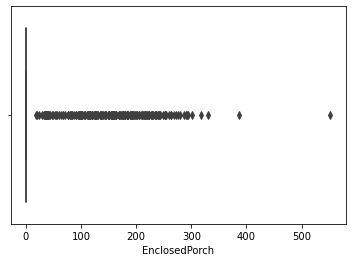

In [125]:
sns.boxplot(data= df_train,x='EnclosedPorch')
plt.show()

In [126]:
desc_cols = df_train.describe().columns
desc_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [127]:
# ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
#        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal']

In [128]:
for dc in range(1,len(desc_cols)):
    print(df_train[desc_cols[dc]].describe())

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
count    1460.000000
mean       70.306164
std        23.945565
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall

In [129]:
# Q1 = np.percentile(df_train['LotArea'],25)
# Q3 = np.percentile(df_train['LotArea'],75)
# IQR = Q3-Q1
# lower_fence = Q1 - (1.5*IQR)
# upper_fence = Q3 + (1.5*IQR)
# df_train['LotArea'] = df_train['LotArea'].apply(lambda x : x if x < upper_fence else upper_fence)
# print(Q1,Q3)
# print(lower_fence,upper_fence)

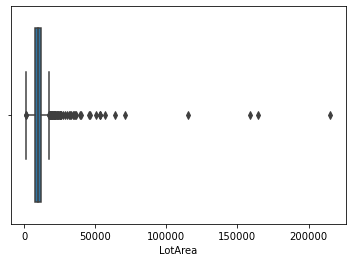

In [130]:
sns.boxplot(data = df_train,x='LotArea')
plt.show()

In [131]:
df_train['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [132]:
# for col in range(1,len(desc_cols)):
#     sns.boxplot(data = df_train,x=desc_cols[col])
#     plt.show()

In [133]:
# ['MSSubClass','LotFrontage','']
desc_cols1 = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF','WoodDeckSF']
# treat outliers
for i in range(len(desc_cols1)):
    Q1 = np.percentile(df_train[desc_cols1[i]],25)
    Q3 = np.percentile(df_train[desc_cols1[i]],75)
    IQR = Q3-Q1
    lower_fence = Q1 - (1.5*IQR)
    upper_fence = Q3 + (1.5*IQR)
    df_train[desc_cols1[i]] = df_train[desc_cols1[i]].apply(lambda x : x if x < upper_fence else upper_fence)
#     df_train[desc_cols[i]] = df_train[desc_cols[i]].apply(lambda x : x if x > lower_fence else lower_fence)

In [134]:
# for i in range(1,len(desc_cols)):
#     sns.boxplot(data = df_train, x = desc_cols[i])
#     plt.show()

In [135]:
# for col in desc_cols:
#     sns.distplot(df_train[col])
#     plt.show()
#     sns.histplot(df_train[col])
#     plt.show()

## Encoding categorical features

In [136]:
# categorical columns
cat_cols = df_train.columns.drop(desc_cols)
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [137]:
for cat_col in cat_cols:
    df = pd.get_dummies(df_train[cat_col],prefix=cat_col,drop_first=True)
    df_train = pd.concat([df_train,df],axis=1)
    df_train = df_train.drop(cat_col,axis = 1)

In [138]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=357)

In [139]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.306164,10516.828082,6.099315,5.575342,1971.267808,1984.865753,89.406336,439.997517,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,23.945565,9981.264932,1.382997,1.112799,30.202904,20.645407,134.017553,433.219435,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,410.625000,1780.625000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
# for test data
df_train.pop('Id')

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

### our data is clean so we train out model


In [141]:
y = df_train.pop('SalePrice')
X = df_train

In [142]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_validate, y_train, y_validate = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=2)

In [145]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
104,50,75,7758,7,4,1931,1950,410.625,224.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1185,50,60,9738,5,7,1924,1950,0.000,392.0,0.0,...,0,0,0,0,1,0,0,0,1,0
786,50,60,10800,5,6,1915,1950,0.000,686.0,0.0,...,0,0,0,0,1,0,0,0,1,0
379,60,60,8123,6,5,2000,2000,16.000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1129,90,60,7200,5,5,1980,1980,180.000,936.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,20,82,11880,7,5,1978,1978,206.000,704.0,0.0,...,0,0,0,0,0,0,0,0,0,0
466,20,85,10628,7,5,1970,1970,0.000,778.0,0.0,...,0,0,0,0,1,0,0,0,1,0
299,20,80,14000,6,8,1950,2004,0.000,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
493,20,70,7931,5,6,1960,1960,0.000,374.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [146]:
y_train

104     169500
1185    104900
786     139000
379     179000
1129    140000
         ...  
1099    157000
466     167000
299     158500
493     155000
527     446261
Name: SalePrice, Length: 1021, dtype: int64

In [147]:
X_validate

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
503,20,100,15602,7,8,1959,1997,0.0,1247.0,0.0,...,0,0,0,0,1,0,0,0,1,0
101,60,77,9206,6,5,1985,1985,336.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
608,70,78,12168,8,6,1934,1998,0.0,428.0,0.0,...,0,0,0,0,1,0,1,0,0,0
1089,120,37,3316,8,5,2005,2005,0.0,1039.0,0.0,...,0,0,0,0,1,0,0,0,1,0
819,120,44,6371,7,5,2009,2010,128.0,733.0,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,50,60,9060,6,5,1939,1950,0.0,204.0,0.0,...,0,0,0,0,1,0,0,0,1,0
557,50,60,11040,4,6,1920,1950,0.0,637.0,0.0,...,0,0,0,0,0,0,0,0,1,0
391,60,71,12209,6,5,2001,2002,0.0,690.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1254,60,60,6931,7,5,2003,2004,92.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [148]:
y_validate

503     289000
101     178000
608     359100
1089    197000
819     224000
         ...  
1384    105000
557     108000
391     215000
1254    165400
116     139000
Name: SalePrice, Length: 438, dtype: int64

## scaling on dataset

In [149]:
# from sklearn.preprocessing import StandardScaler

In [150]:
# scaler = StandardScaler()

In [151]:
# y_train = np.array(y_train)
# y_train = y_train.reshape(-1,1)

In [152]:
# y_validate = np.array(y_validate)
# y_validate = y_validate.reshape(-1,1)

In [153]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_validate)
# y_train_scaled = scaler.fit_transform(y_train)
# y_val_scaled = scaler.transform(y_validate)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
sale_lr = LinearRegression()

In [156]:
sale_lr.fit(X_train,y_train)

LinearRegression()

In [157]:
y_pred_val= sale_lr.predict(X_validate)

In [158]:
y_pred_val

array([290354.9993724 , 165396.12134619, 329909.65772005, 190270.9698871 ,
       248161.68641036, 233765.42978493, 207620.40960638, 193561.45384968,
       148295.80522465, 360488.94130867, 200617.794744  , 209806.88613677,
       114180.29194695, 160946.81109783,  81562.8565233 , 229565.36232218,
       250350.44905221, 306395.82718235, 236031.92908281, 302647.53837834,
       369460.2615443 , 160876.66394938, 165805.63775745, 218450.86269264,
       453630.32305771, 256980.86435803, 145310.17057225, 246626.1926299 ,
       229590.07556663, 429927.02539357, 339610.57035804, 161360.24989307,
       315328.72224612, 123646.79516578, 173035.00730533, 199617.07783137,
       155005.51317355, 316026.84091798, 340368.66513506, 371096.01497705,
       136356.95279786, 210782.27647803, 137677.25749866,  91494.07500908,
        97946.47189075, 250797.00988721,  41388.35548427, 163142.72649287,
       102170.83849546, 128717.78582229, 146436.42494838,  97369.42985497,
       225148.6774275 , 1

In [159]:
from sklearn.metrics import r2_score,mean_squared_error

In [160]:
score = r2_score(y_validate,y_pred_val)

In [161]:
score

0.572195203549596

In [162]:
rmse = np.sqrt(mean_squared_error(y_validate,y_pred_val))
rmse

52626.09583491912

In [163]:
# coefficient
sale_lr.coef_

array([ 7.33398678e+01,  3.72633783e+01,  9.31221865e-01,  6.28401025e+03,
        4.66853543e+03,  3.39662221e+02,  1.55790369e+02,  1.16496024e+01,
        1.69877336e+00, -2.07518826e-06, -2.50718565e+01,  4.45528541e+01,
        2.22662730e+01,  4.24374782e+01, -4.87800207e-07,  3.10589401e+01,
       -5.44775521e+02,  2.10220124e+01,  2.35747672e+03, -4.26355388e+03,
       -5.12287198e+03, -1.07100200e+04,  1.66083355e+03,  5.27542311e+03,
        7.95660716e+03,  2.61907834e+00,  2.05308799e+01,  1.37415875e+01,
        3.19283207e+01,  3.06972826e+01,  4.98068146e+01,  3.75121050e+02,
        3.77489270e-01, -3.22632695e+02, -5.85240533e+02,  4.26285260e+04,
        2.33406379e+04,  3.10363349e+04,  1.86850137e+04,  2.12550898e+03,
        5.31314608e+03, -3.89181412e+03, -1.86688440e+03, -1.11787978e+04,
        9.01376733e+02, -3.27334747e+03, -1.71844009e+04, -2.43976134e+03,
       -1.14303231e+04,  1.37157591e+04, -1.01074171e+04, -3.66660142e+03,
       -1.41995019e+03,  

In [164]:
# intercept
sale_lr.intercept_

83336.05842198609

### Assumptions

In [165]:
y_pred_train = sale_lr.predict(X_train)

In [166]:
residual = y_train - y_pred_train

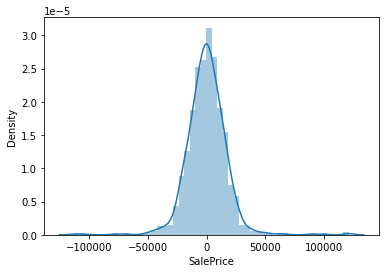

In [167]:
sns.distplot(residual)
plt.show()

### residual error is normally distributed

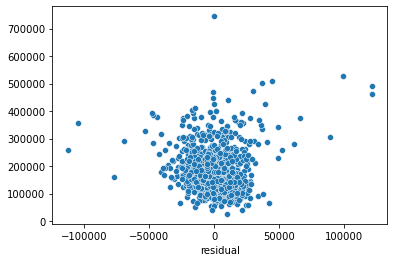

In [168]:
sns.scatterplot(x=residual.squeeze(),y=y_pred_train.squeeze())
plt.xlabel('residual')
plt.show()

## errors are independant of each other

# overfit/underfit

In [169]:
y_pred_train = sale_lr.predict(X_train)

score_train =r2_score(y_train , y_pred_train) 
score_val = r2_score(y_validate , y_pred_val)

print(score_train,score_val)

0.9536150656849577 0.572195203549596


In [170]:
y_pred_val = sale_lr.predict(X_validate)
y_pred_val

array([290354.9993724 , 165396.12134619, 329909.65772005, 190270.9698871 ,
       248161.68641036, 233765.42978493, 207620.40960638, 193561.45384968,
       148295.80522465, 360488.94130867, 200617.794744  , 209806.88613677,
       114180.29194695, 160946.81109783,  81562.8565233 , 229565.36232218,
       250350.44905221, 306395.82718235, 236031.92908281, 302647.53837834,
       369460.2615443 , 160876.66394938, 165805.63775745, 218450.86269264,
       453630.32305771, 256980.86435803, 145310.17057225, 246626.1926299 ,
       229590.07556663, 429927.02539357, 339610.57035804, 161360.24989307,
       315328.72224612, 123646.79516578, 173035.00730533, 199617.07783137,
       155005.51317355, 316026.84091798, 340368.66513506, 371096.01497705,
       136356.95279786, 210782.27647803, 137677.25749866,  91494.07500908,
        97946.47189075, 250797.00988721,  41388.35548427, 163142.72649287,
       102170.83849546, 128717.78582229, 146436.42494838,  97369.42985497,
       225148.6774275 , 1

In [171]:
y_validate

503     289000
101     178000
608     359100
1089    197000
819     224000
         ...  
1384    105000
557     108000
391     215000
1254    165400
116     139000
Name: SalePrice, Length: 438, dtype: int64

In [172]:
from sklearn.linear_model import Lasso,Ridge

lasso = Lasso(alpha = 28)

lasso.fit(X_train,y_train)

lpred_train = lasso.predict(X_train)

lpred_test = lasso.predict(X_validate)

l_r2_test = r2_score(y_validate, lpred_test)
l_r2_train = r2_score(y_train, lpred_train)

print("lasso score train : {}  lasso score test : {}".format(l_r2_train,l_r2_test))

lasso score train : 0.9469806685066458  lasso score test : 0.6000066007694786
